In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# **No. 2**

## **Bagian A.**

In [2]:
url = 'https://raw.githubusercontent.com/isnanmulia/lecture-datasets/main/mobileprice_modified.csv'
dataset = pd.read_csv(url)
print(dataset.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0          842.0     0          2.2         0   1       0         7.0    0.6   
1         1021.0     1          0.5         1   0       1        53.0    0.7   
2          563.0     1          0.5         1   2       1        41.0    0.9   
3          615.0     1          2.5         0   0       0        10.0    0.8   
4         1821.0     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0      188.0        2  ...         20       756     NaN     9     7   
1      136.0        3  ...        905      1988  2631.0    17     3   
2      145.0        5  ...       1263      1716  2603.0    11     2   
3      131.0        6  ...       1216      1786  2769.0    16     8   
4      141.0        2  ...       1208      1212  1411.0     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0

In [13]:
# Memisahkan atribut prediktor (X) dan label (y)
X = dataset.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = dataset.iloc[:, -1]   # Kolom terakhir sebagai label

# Menampilkan beberapa baris dari hasil pemisahan
print("Atribut prediktor (X):")
print(X.head())

print("\nLabel (y):")
print(y.head())

Atribut prediktor (X):
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0          842.0     0          2.2         0   1       0         7.0    0.6   
1         1021.0     1          0.5         1   0       1        53.0    0.7   
2          563.0     1          0.5         1   2       1        41.0    0.9   
3          615.0     1          2.5         0   0       0        10.0    0.8   
4         1821.0     1          1.2         0  13       1        44.0    0.6   

   mobile_wt  n_cores  pc  px_height  px_width     ram  sc_h  sc_w  talk_time  \
0      188.0        2   2         20       756     NaN     9     7         19   
1      136.0        3   6        905      1988  2631.0    17     3          7   
2      145.0        5   6       1263      1716  2603.0    11     2          9   
3      131.0        6   9       1216      1786  2769.0    16     8         11   
4      141.0        2  14       1208      1212  1411.0     8     2         15   

   three_

## **Bagian B.**

In [14]:
# Print missing values pada dataset
print(dataset.isnull())

# Memeriksa missing values di setiap kolom
missing_values = dataset.isna().sum()

# Menampilkan hanya kolom yang memiliki missing values
missing_values = missing_values[missing_values > 0]
print("Missing values per baris:")
print(missing_values)

      battery_power   blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0             False  False        False     False  False   False       False   
1             False  False        False     False  False   False       False   
2             False  False        False     False  False   False       False   
3             False  False        False     False  False   False       False   
4             False  False        False     False  False   False       False   
...             ...    ...          ...       ...    ...     ...         ...   
1995          False  False        False     False  False   False       False   
1996          False  False        False     False  False   False       False   
1997          False  False        False     False  False   False       False   
1998          False  False        False     False  False   False       False   
1999          False  False        False     False  False   False       False   

      m_dep  mobile_wt  n_cores  ...  p

In [15]:
# Impute missing values with mean
imputer = SimpleImputer(fill_value=np.nan, strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)
print(data_imputed)

# Check if there are any missing values left
print("Missing values setelah dilakukan SimpleImputer:")
print(data_imputed.isna().sum())

      battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0             842.0   0.0          2.2       0.0   1.0     0.0         7.0   
1            1021.0   1.0          0.5       1.0   0.0     1.0        53.0   
2             563.0   1.0          0.5       1.0   2.0     1.0        41.0   
3             615.0   1.0          2.5       0.0   0.0     0.0        10.0   
4            1821.0   1.0          1.2       0.0  13.0     1.0        44.0   
...             ...   ...          ...       ...   ...     ...         ...   
1995          794.0   1.0          0.5       1.0   0.0     1.0         2.0   
1996         1965.0   1.0          2.6       1.0   0.0     0.0        39.0   
1997         1911.0   0.0          0.9       1.0   1.0     1.0        36.0   
1998         1512.0   0.0          0.9       0.0   4.0     1.0        46.0   
1999          510.0   1.0          2.0       1.0   5.0     1.0        45.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width      

## **Bagian C.**

In [16]:
from sklearn.preprocessing import StandardScaler

# Separate predictors and target
X = dataset.drop(columns=['price_range'])
y = dataset['price_range']

# Apply StandardScaler to predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show the first few rows of the scaled data
X_scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.900589,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.378123,0.340740,1.346276,-1.101971,-1.305750,-1.408949,-1.146784,NaN,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.493369,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.158847,0.687548,-0.122724,-0.664768,-0.645989,0.585778,1.704465,0.466533,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.535307,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.497029,1.381165,0.131526,0.209639,-0.645989,1.392684,1.074968,0.440718,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.417008,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.212668,1.034357,-0.263974,0.646842,-0.151168,1.286750,1.236971,0.593768,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.326610,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.662483,0.340740,0.018526,-1.101971,0.673534,1.268718,-0.091452,-0.658292,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


In [17]:
# Display descriptive statistics of the original data before filling missing values
original_stats = X.describe()

# Show the statistics
original_stats

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1990.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,1990.000000,2000.000000,1990.000000,2000.000000,2000.000000,2000.000000,2000.000000,1990.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1237.867839,0.4950,1.522250,0.509500,4.309500,0.521500,31.987940,0.501750,140.344221,4.520500,9.916500,645.108000,1251.515500,2124.991960,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.676025,0.5001,0.816004,0.500035,4.341444,0.499662,18.136427,0.288416,35.407114,2.287837,6.064315,443.780811,432.199447,1084.885362,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,850.250000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1208.250000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1225.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.000000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [18]:
# Fill missing values with the mean of each column
X_filled = X.fillna(X.mean())

# Apply StandardScaler to predictors with filled missing values
X_scaled_filled = scaler.fit_transform(X_filled)

# Convert scaled data back to DataFrame
X_scaled_filled_df = pd.DataFrame(X_scaled_filled, columns=X.columns)

# Display descriptive statistics after filling missing values and scaling
processed_stats = X_scaled_filled_df.describe()
processed_stats

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.563194e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,5.684342e-17,-1.030287e-16,-3.765876e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.492140e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.680562e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.658030e+00,-1.393304e+00,-1.709003e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.727512e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.806122e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.839717e-01,-1.046495e+00,-8.876966e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.450354e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-1.680370e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,0.000000e+00,-6.069151e-03,1.857225e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,5.091091e-03,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.578380e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.853054e-01,1.034357e+00,8.398784e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.642295e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.733620e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.769944e+00,1.727974e+00,1.689505e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.731225e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


# **No. 3**

## **Bagian A.**

In [5]:
# Memisahkan fitur (X) dan label (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Decision Tree: {accuracy:.2f}")


Akurasi model Decision Tree: 0.79


## **Bagian B.**

In [6]:
# Memisahkan fitur (X) dan label (y)
X = dataset.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = dataset.iloc[:, -1]   # Kolom terakhir sebagai label

# Membagi dataset menggunakan holdout (85% training, 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Menampilkan jumlah sampel di setiap set
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 1700
Jumlah data testing: 300


## **Bagian C.**

Confusion Matrix:
[[68 11  0  1]
 [ 6 56  9  1]
 [ 0  9 47 12]
 [ 0  0  9 71]]
Akurasi Model: 0.81


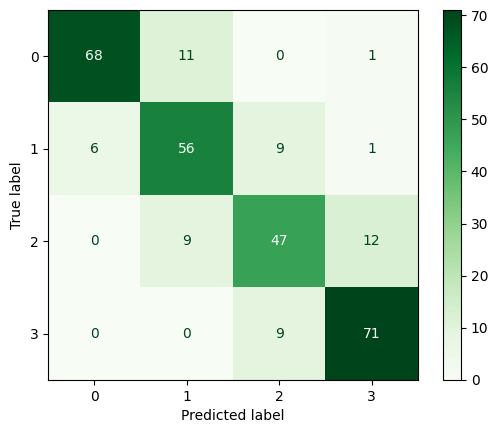

In [10]:
# Memisahkan fitur (X) dan label (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Membagi data menjadi training (85%) dan testing (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan confusion matrix dan akurasi
print(f"Confusion Matrix:\n{cm}")
print(f"Akurasi Model: {accuracy:.2f}")

# Visualisasi confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Greens')

# **No. 4**

## **Bagian A.**

Cluster
1    542
3    466
2    399
4    319
0    274
Name: count, dtype: int64


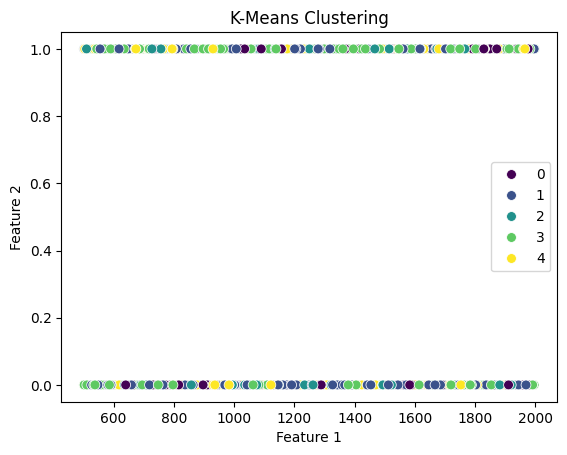

In [27]:
# Menggunakan semua kolom sebagai fitur (tanpa label) untuk clustering
X = data_imputed.iloc[:, :-1]

# Membuat model K-Means dengan jumlah kluster (k) awal
kmeans = KMeans(n_clusters=5, random_state=42)

# Melatih model dan memprediksi kluster
clusters = kmeans.fit_predict(X)

# Menambahkan hasil kluster ke dataset untuk analisis lebih lanjut
data_imputed['Cluster'] = clusters

# Menampilkan jumlah sampel di setiap kluster
print(data_imputed['Cluster'].value_counts())

# Visualisasi hasil clustering (jika dimensi memungkinkan)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=clusters, palette='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **Bagian B.**

Silhouette Score: 0.25


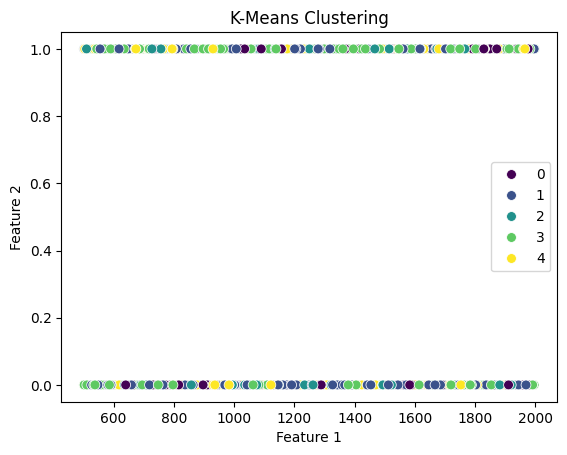

In [23]:
# Menggunakan semua kolom sebagai fitur (tanpa label) untuk clustering
X = data_imputed.iloc[:, :-1]

# Membuat model K-Means dengan jumlah kluster (k=3)
kmeans = KMeans(n_clusters=5, random_state=42)

# Melatih model dan memprediksi kluster
clusters = kmeans.fit_predict(X)

# Menghitung silhouette score
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.2f}")

# Visualisasi hasil clustering (jika dimensi memungkinkan)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=clusters, palette='viridis', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()